# Data Exploration and Preprocessing Notebook

In [1]:
import json
import regex
from datetime import datetime, timezone
import pandas as pd

## 1- Extracting relevant data

The set of keys that we will consider in our sentiment analysis task are the following:
- `selftext`: the text of the post, will contain nuances of the sentiment
- `title`: the title of the post often refers to the asset or the topic of the post
- `created` or `created_utc`: is the date of creation of the post

We removed submissions that had `[deleted]` or `[removed]` in either their text or title. <br>
This means that the post was moderated and we cannot use it for our analysis. <br>

In [3]:
# create a new json file with data that only contains the above keys
data = []
with open("Data/wallstreetbets_submissions", "r") as f:
    for line in f:
        d = json.loads(line)
        # check if the title or text contains the string "[removed]"
        if "[removed]" not in d['title'] and "[removed]" not in d['selftext'] and "[deleted]" not in d['title'] and "[deleted]" not in d['selftext']:
            data.append(
                {
                    'date': d['created_utc'] if 'created_utc' in d else d['created'],
                    'title': d['title'],
                    'text': d['selftext'],
                }
            )

There are **822004** such submissions that we will further preprocess in order to perform sentiment analysis.<br>
These submissions are going to aliment our sentiment analysis model.

In [4]:
len(data)

822004

The cleaned data file can be found under `Data/wallstreetbets_submissions_cleaned.json`

In [5]:
# write the data to a new file in a well formatted way
with open("Data/wallstreetbets_submissions_cleaned.json", "w") as f:
    json.dump(data, f, indent=4)

## 2- SPY Data

Now we are going to check how many submissions are related to the S&P 500 ETF (SPY).<br>
For this we will be looking for the keywords:
- `SPY`
- `SP500`
- `S&P500`
- `S&P 500`
- `S&P`
- `Standard & Poor's`
- `Standard and Poor's`
- `Standard and Poor 500`
- `Standard & Poor 500`
- `Standard and Poor 500`
- `Standard & Poor`
- `Standard and Poor`
- `Standard and Poor's 500`
- `Standard & Poor's 500`
- `Standard and Poor's 500`
in the title and the text <br>
We will be using regexes to find these keywords in an optimized way.

In [4]:
# create a list of regexes that match the words in the above list
words = ["spy", "sp500", "s&p", "standard & poor", "standard and poor"]

# create a regex pattern that matches any of the words in the above list
pattern = regex.compile(r'\b(?:' + '|'.join(words) + r')\b', regex.IGNORECASE)

In [5]:
spy_data = []

with open("Data/wallstreetbets_submissions_cleaned.json", "r") as f:
    data = json.load(f)
    for d in data:
        if pattern.search(d['title']) or pattern.search(d['text']):
            spy_data.append(d)

The data related to SPY can be found under `Data/wallstreetbets_submissions_SPY.json`

In [7]:
with open("Data/wallstreetbets_submissions_spy.json", "w") as f:
    json.dump(spy_data, f, indent=4)

To have an idea on the period that is spanned by the data related to SPY, we will plot the number of submissions per day.

In [25]:
date_count = {}
utc_zone = timezone.utc

for d in spy_data:
    date = datetime.fromtimestamp(int(d['date']), tz=utc_zone)
    if date in date_count:
        date_count[date] += 1
    else:
        date_count[date] = 1

## 3- Finding the right assets

We are going to check the data for keywords that are related to specific stocks. <br>
We will be looking for the keywords:
- `AAPL`
- `TSLA`
- `NVDA`
- `AMZN`
- `LVMH`

In [64]:
amzn = [
    "amazon",
    "primeday", 
    "alexa", 
    "kindle", 
    "aws",
    "amzn",
    "prime",
    "bezos",
    "e-commerce giant"
]

tsla = [
    "tsla",
    "tesla",
    "elon",
    "musk",
    "tesla",
    "model s",
    "model x",
    "model 3",
    "model y",
    "gigafactory",
    "electric vehicles",
    "ev",
    "autopilot"
]

nvda = [
    "nvda",
    "nvidia",
    "jensen huang",  # CEO of nvidia
    "geforce",  # nvidia's popular gPU brand
    "turing",  # nvidia's gPU architecture
    "ampere",  # A more recent nvidia gPU architecture
    "rtx",  # Ray tracing gPUs
    "gtx",  # Previous generation gPUs
    "quadro",  # Professional graphics cards
    "tesla gpu",  # not to be confused with Tesla Motors
    "cuda",  # nvidia's parallel computing platform
    "dlss",  # Deep Learning Super Sampling, nvidia's AI-driven image upscaling technology
    "ray tracing",  # graphics rendering technique that nvidia gPUs support
    "g-sync",  # nvidia's display technology
    "omniverse"  # nvidia's collaboration and simulation platform
]

aapl = [
    "aapl",
    "apple",
    "tim cook"
    "steve jobs"
    "iphone",
    "ipad",
    "mac",
    "ios",
    "app store",
    "icloud",
    "siri",
    "wwdc",  # Apple's Worldwide Developers Conference
    "m1",
    "m2",
    "face id",
    "touch id",
    "homepod",
    "airtag",
    "Aarkit",  # Apple's AR platform
    "carplay",
    "airpods"
]

lvmh = [
    "lvmh",
    "bernard arnault",
    "louis vuitton",
    "dior",
    "givenchy",
    "Fendi",
    "céline",
    "kenzo",
    "marc jacobs",
    "Hublot",
    "tag Heuer",
    "sephora",
    "moët & chandon",
    "dom pérignon",
    "hennessy",
    "cognac",
    "loro piana",
    "dfs group",
    "la samaritaine",
    "cheval blanc",
]

wmt = [
    "wmt",
    "walmart",
    "doug mcmillon",
    "sam walton",
    "walton family",
    "supercenter",
    "hypermarket",
    "neighborhood market",
    "sam's"
]

goog = [
    "goog",
    "google",
    "alphabet",
    "larry page",
    "sergey brin",
    "sundar pichai",
    "android",
    "chrome",
    "search",
    "maps",
    "youtube",
    "play store",
    "pixel",
    "nexus",
    "nest",
    "waymo",
    "deepmind",
    "loons",
    "sidewalk labs",
    "fitbit",
    "waze",
    "doubleclick",
    "admob",
    "adsense",
    "adwords",
    "gmail",
    "drive",
    "photos",
    "podcasts",
    "books",
    "stadia",
    "pay",
    "wallet",
    "shopping",
    "one",
    "workspace",
    "cloud",
    "gsuite",
    "firebase",
    "colab",
    "bigquery",
    "kubernetes",
    "chromeos",
    "chromebook",
    "chromecast",
    "nexus",
    "pixel",
    "pixelbook",
    "pixelbuds",
    "voice",
    "hangouts",
    "duo",
    "meet",
    "gmail",
    "maps",
    "street view"
]

spy = ["spy", "sp500", "s&p", "standard & poor", "standard and poor"]

In [32]:
utc_zone = timezone.utc

def check_keywords(comments, keywords):
    """
    This function checks if any of the keywords are present in the title or text of the submission.
    It returns a dict of {date: count} where count is the number of keywords found in the submission.
    """
    # create a regex pattern that matches any of the words in the above list
    pattern = regex.compile(r'\b(?:' + '|'.join(keywords) + r')\b', regex.IGNORECASE)

    keyword_count = {}
    for c in comments:
        # look for the keywords in the title and text of the submission in lower case using the regex library
        if pattern.search(c['text'].lower()) or pattern.search(c['title'].lower()):
            date = datetime.fromtimestamp(int(c['date']), tz=utc_zone).date()
            if date in keyword_count:
                keyword_count[date] += 1
            else:
                keyword_count[date] = 1

    return keyword_count

In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np  # Needed for mathematical operations like mean and median

def plot_date_counts(title, date_counts):
    # Sort the dictionary by date to ensure the plot is ordered
    sorted_dates = sorted(date_counts.items())
    dates, counts = zip(*sorted_dates)

    # Calculate statistics
    mean_count = np.mean(counts)
    median_count = np.median(counts)
    max_count = max(counts)
    min_count = min(counts)

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(dates, counts, marker='o', linestyle='-', color='b', markersize=2, linewidth=1)

    # Add horizontal lines for mean and median
    plt.axhline(y=mean_count, color='r', linestyle='--', linewidth=1, label=f'Mean: {mean_count:.2f}')
    plt.axhline(y=median_count, color='g', linestyle=':', linewidth=1, label=f'Median: {median_count:.2f}')

    # Formatting the date display on the x-axis
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=7))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.gcf().autofmt_xdate()  # Rotation

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.grid(True)
    plt.legend()  # Add legend to the plot
    plt.tight_layout()

    # Display statistics in the plot
    plt.figtext(0.99, 0.01, f'Max: {max_count}\nMin: {min_count}', horizontalalignment='right')

    plt.show()

In [9]:
with open("Data/wallstreetbets_submissions_cleaned.json", "r") as f:
    comments = json.load(f)

### Checking TSLA:

In [42]:
tsla_dict = check_keywords(comments, tsla)
nvda_dict = check_keywords(comments, nvda)
amzn_dict = check_keywords(comments, amzn)
aapl_dict = check_keywords(comments, aapl)
lvmh_dict = check_keywords(comments, lvmh)
wmt_dict = check_keywords(comments, wmt)
goog_dict = check_keywords(comments, goog)
spy_dict = check_keywords(comments, spy)

In [66]:
# get the date of the maximum count for each stock
print("tsla max date: ", max(tsla_dict, key=tsla_dict.get))
print("nvda max date: ", max(nvda_dict, key=nvda_dict.get))
print("amzn max date: ", max(amzn_dict, key=amzn_dict.get))
print("aapl max date: ", max(aapl_dict, key=aapl_dict.get))
print("lvmh max date: ", max(lvmh_dict, key=lvmh_dict.get))
print("wmt max date: ", max(wmt_dict, key=wmt_dict.get))
print("goog max date: ", max(goog_dict, key=goog_dict.get))
print("spy max date: ", max(spy_dict, key=spy_dict.get))


tsla max date:  2021-01-28
nvda max date:  2021-11-04
amzn max date:  2021-02-02
aapl max date:  2021-01-28
lvmh max date:  2021-03-30
wmt max date:  2018-08-16
goog max date:  2021-01-28
spy max date:  2020-03-16


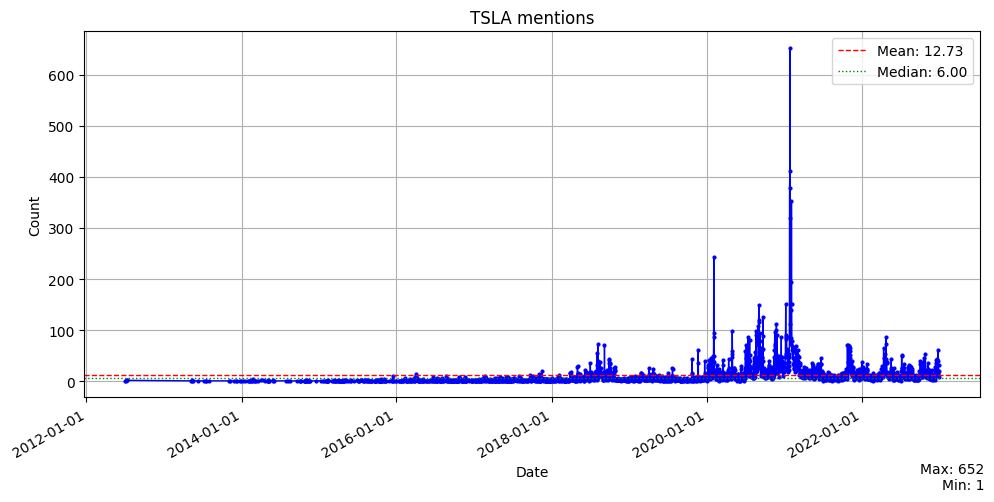

In [71]:
plot_date_counts("TSLA mentions", tsla_dict)

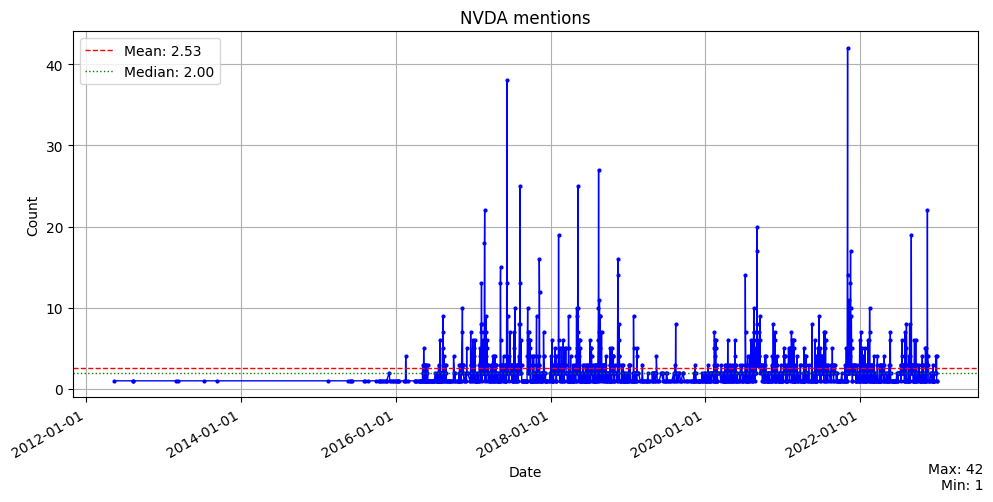

In [72]:
plot_date_counts("NVDA mentions", nvda_dict)

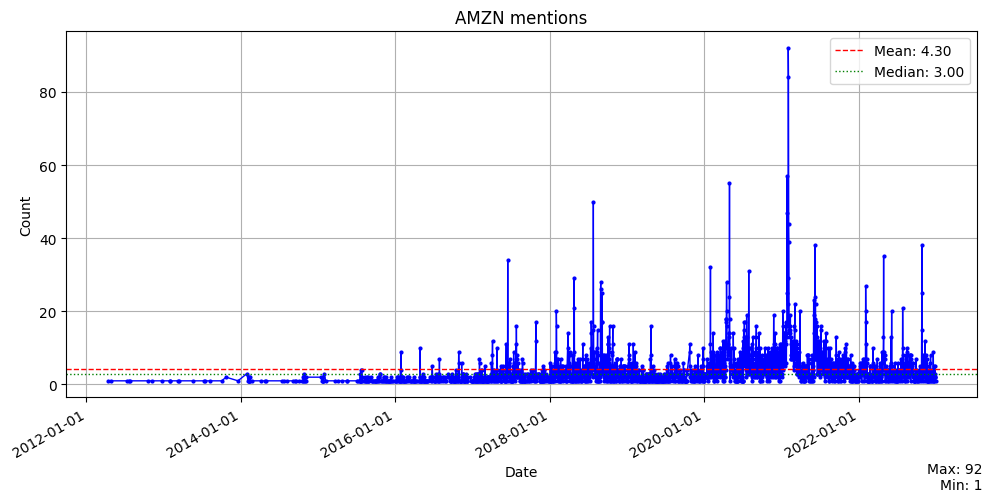

In [73]:
plot_date_counts("AMZN mentions", amzn_dict)

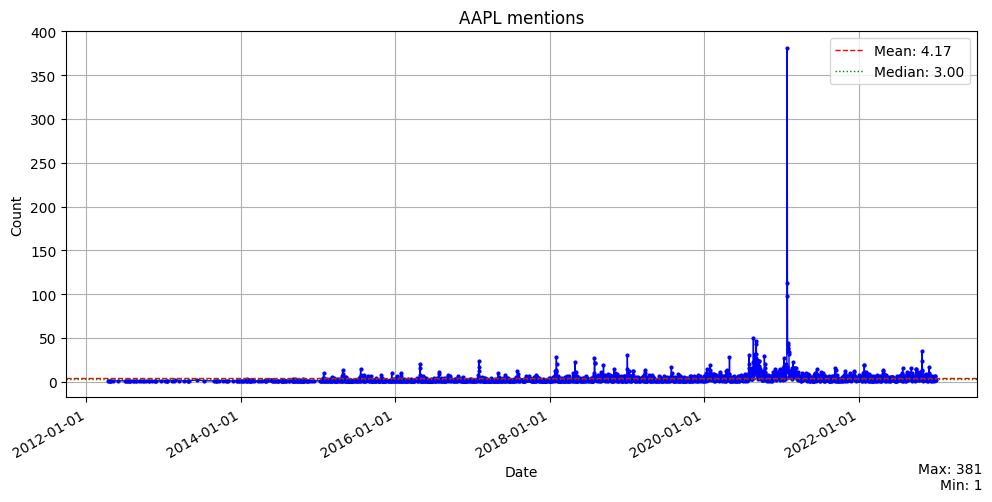

In [74]:
plot_date_counts("AAPL mentions", aapl_dict)

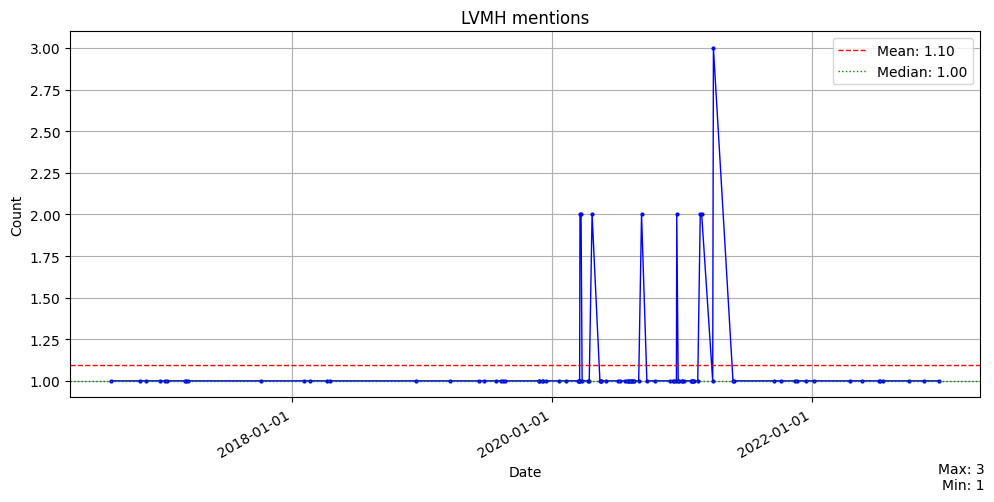

In [75]:
plot_date_counts("LVMH mentions", lvmh_dict)

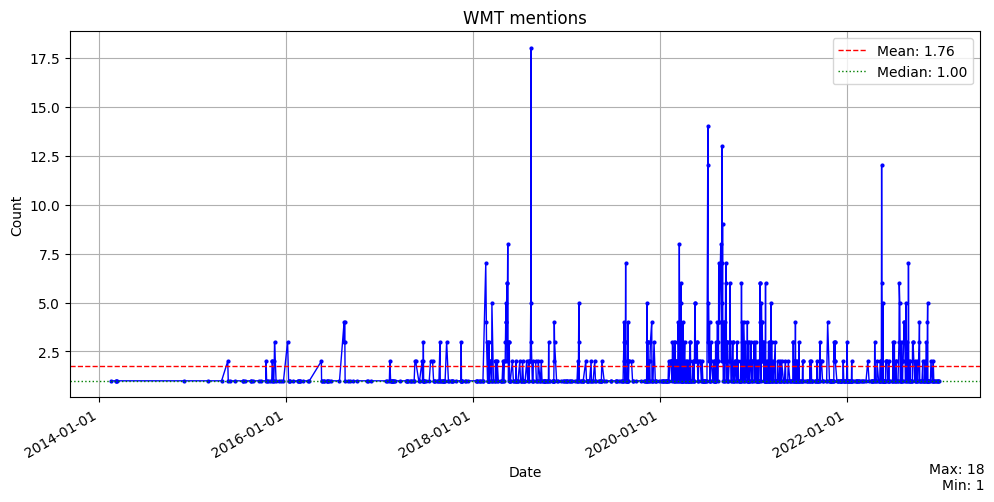

In [76]:
plot_date_counts("WMT mentions", wmt_dict)

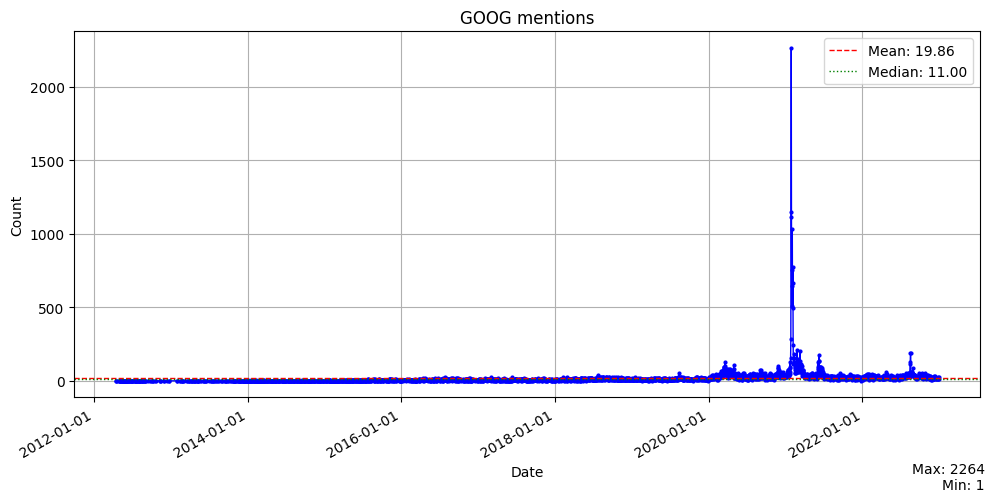

In [77]:
plot_date_counts("GOOG mentions", goog_dict)

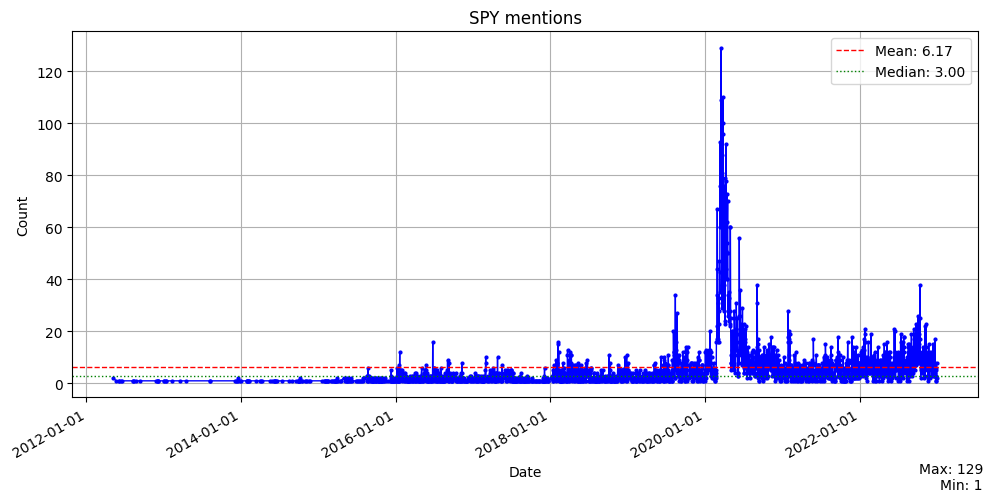

In [78]:
plot_date_counts("SPY mentions", spy_dict)

In [3]:
df = pd.read_csv("Data/tweets_labelled_09042020_16072020.csv", sep=";")

In [5]:
# count non nan sentiment values
sentiment_count = df['sentiment'].value_counts()
print(sentiment_count)

sentiment
positive    528
neutral     424
negative    348
Name: count, dtype: int64


In [6]:
df2 = pd.read_csv("Data/stock_data.csv", sep=",")

In [8]:
sentiment_count = df2['Sentiment'].value_counts()
print(sentiment_count)

Sentiment
 1    3685
-1    2106
Name: count, dtype: int64
